# Определение перспективных продуктов для интернет-магазина по продаже компьютерных игр

**Краткое описание проекта**
Есть интернет-магазин, который продаёт по всему миру
компьютерные игры. На следующий год необходимо спланировать рекламную компанию магазина. Для этих целей из открытых источников закачаны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Постановка задачи**
Необходимо выявить потенциально переспективные игровые консоли и игровые жанры на разных рынках для планирования рекламных расходов.

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('datasets/games.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод 1

1) Необходимо переименовать названия столбцов в соотвествии с правилами змеиного регистра

2) Есть ряд пропущеных значений в различных столбцах, их необходимо изучить и заменить по возможности

3) Необходимо изменить тип данных в столбцах Year_of_Release, User_Score на целочисленный

## Предобработка данных

### Названия столбцов

In [3]:
# приведем названия столбцов к нижнему регистру

df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Пропуски

In [4]:
# подсчет пропусков в df

drops_abs = df.isna().sum()
drops_perc = round(drops_abs / len(df.index) *100)

drops = pd.concat([drops_abs, drops_perc], axis=1)
drops.columns = ['кол-во пропусков', '% пропусков']
drops = drops.sort_values(by='% пропусков', ascending=False)
drops

,кол-во пропусков,% пропусков
critic_score,8578,51.0
user_score,6701,40.0
rating,6766,40.0
year_of_release,269,2.0
name,2,0.0
platform,0,0.0
genre,2,0.0
na_sales,0,0.0
eu_sales,0,0.0
jp_sales,0,0.0


По столбцу rating произвести какую-то смысловую замену нельзя, поскольку это маркировка возрастной категории, и никакой доп. информации по возрасту юзеров нет, но из-за большого количество пропусков удалить или отфильтровать нельзя. Воспользуемся позже при предобработке данных присвоением категории 'No rating'.

По остальным столбцам с пропусками попробуем заменить хотя бы часть пропущенных значений.

<div style="border-radius: 15px; border: 1px solid black;  padding: 15px;">
<b> Столбец rating</b>

In [5]:
len(df[df['rating'].isna()])

6766

In [6]:
# как и планировалось выше, присвоем играм без рейтинга категорию 'No rating'

df['rating'] = df['rating'].fillna('No rating')

<div style="border-radius: 15px; border: 1px solid black;  padding: 15px;">
<b> Столбец genre</b>

In [7]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,No rating
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,No rating


Можно удалить эти 2 строки, в них слишком много пропусков по разным столбцам

In [8]:
df = df[~df['genre'].isna()]

<div style="border-radius: 15px; border: 1px solid black;  padding: 15px;">
<b> Столбец user_score и critic_score</b>

In [9]:
# для удобства дальнейших расчетов и фильтраций заменим пустые значения в столцах user_score и critic_score
# на значение -1 (индикатор отсуствия рейтинга)

df = df.fillna({'critic_score': -1, 'user_score': -1})

In [10]:
# поскольку столбец user_score имеет тип данных object, выведем его уникальные значения

df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
# посчитаем % таких пропусков

round(len(df[df['user_score'] == 'tbd']) / len(df) * 100)

15

- Сокращение tbd в столбце user_score, скорее всего, означает "to be determined" - "должно быть уточнено".
- Удалить 15 данных мы не можем, пока заменим его также, как и пропуски значением -1.

In [12]:
df['user_score'] = df['user_score'].replace('tbd', -1)

In [13]:
# приведем значения столбца user_score к числовому типу

df['user_score'] = pd.to_numeric(df['user_score'])

In [14]:
# измерим корреляцию между рейтингами критиков и юзеров

round(df[df['user_score'] > 0]['user_score'].corr(df[df['critic_score'] > 0]['critic_score']), 2)

0.58

- Поскольку корреляция между столбцами существенная можно выразить значения одного столбца через значения другого
- Для того, чтобы заменить часть пропусков (там где есть заполненные перекрестные значения по одному из столбцов) и значений tbd, которые уже были выше заменены на -1, найдем среднее соотношение рейтинга критиков и рейтинга юзеров

In [15]:
# создадим новый датасэт, на основе которого будет рассчитываться искомое соотношение
# это строки, где по столбцам critic_score и user_score находятся значения больше нуля (т.е. исключены NaN и tbd)

df1 = df[(df['critic_score'] > 0) & (df['user_score'] > 0)]

In [16]:
# посмотрим основные стат показатели по соотношению оценок критиков и юзеров по скорректированному датасэту

(df1['critic_score'] / df1['user_score']).describe()

count    7017.000000
mean       10.107999
std         3.169620
min         3.033708
25%         8.764045
50%         9.750000
75%        10.759494
max       120.000000
dtype: float64

<AxesSubplot:>

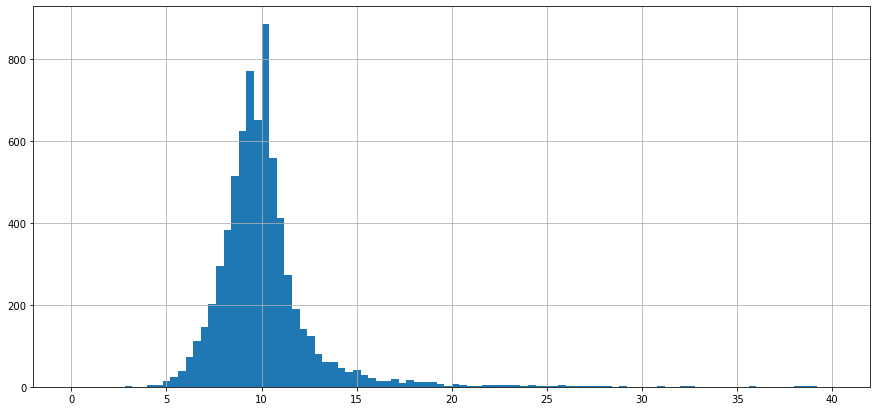

In [17]:
(df1['critic_score'] / df1['user_score']).hist(bins=100, range=(0, 40), figsize=(15, 7))

Разброс, конечно, достаточно большой (есть выбросы справо, но количество они не особо значимы), но медиана и средняя близки по значениям, поэтому вполне приемлимо использовать среднюю для наших целей.

In [18]:
# создадим переменную на основе среднего соотношения оценок критиков и юзеров

ratio_scores = round((df1['critic_score'] / df1['user_score']).mean())
ratio_scores

10

In [19]:
# строки, по которым можно заменить значения -1 в столбце user_score и их количество

display(df[(df['critic_score'] > 0) & (df['user_score'] < 0)].head())

print(
    'Количество строк под замену в столбце user_score:',
    len(df[(df['critic_score'] > 0) & (df['user_score'] < 0)])
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
182,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.2,0.28,85.0,-1.0,T
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,-1.0,E10+
440,Need for Speed III: Hot Pursuit,PS,1998.0,Racing,2.14,0.86,0.0,0.13,88.0,-1.0,E
637,Riven: The Sequel to Myst,PC,1997.0,Adventure,1.52,0.82,0.0,0.10,83.0,-1.0,E
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,-1.0,E


Количество строк под замену в столбце user_score: 1120


In [20]:
# строки, по которым можно заменить значения -1 в столбце critic_score и их количество

display(df[(df['critic_score'] < 0) & (df['user_score'] > 0)].head())

print(
    'Количество строк под замену в столбце critic_score:',
    len(df[(df['critic_score'] < 0) & (df['user_score'] > 0)])
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,-1.0,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,-1.0,4.9,M
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,-1.0,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.90,0.77,-1.0,8.2,E
359,Just Dance 2014,Wii,2013.0,Misc,1.88,1.39,0.00,0.31,-1.0,6.2,E10+


Количество строк под замену в столбце critic_score: 572


In [21]:
# функция для замены значений в столбце user_score через critic_score и ratio

def ratio1(row):
    if row['user_score'] < 0 and row['critic_score'] > 0:
        row['user_score'] = row['critic_score'] / ratio_scores
        return row['user_score']
    else:
        row['user_score'] = row['user_score']
        return row['user_score']
    return row['user_score']

In [22]:
# применим функцию ratio1

df['user_score'] = df.apply(ratio1, axis=1)

In [23]:
# функция для замены значений в столбце critic_score через user_score и ratio

def ratio2(row):
    if row['critic_score'] < 0 and row['user_score'] > 0:
        row['critic_score'] = row['user_score'] * ratio_scores
        return row['critic_score']
    else:
        row['critic_score'] = row['critic_score']
        return row['critic_score']
    return row['critic_score']

In [24]:
# применим функцию ratio1

df['critic_score'] = df.apply(ratio2, axis=1)

In [25]:
print('% замененных строк в столбце user_score:', round(1120/len(df.index)*100))

% замененных строк в столбце user_score: 7


In [26]:
print('% замененных строк в столбце critic_score:', round(572/len(df.index)*100))

% замененных строк в столбце critic_score: 3


<div style="border-radius: 15px; border: 1px solid black;  padding: 15px;">
<b> Столбец year_of_release</b>

In [27]:
# посмотрим, по каким платформам есть пропуски в столбце year_of_release

df[df['year_of_release'].isna()]['platform'].unique()

array(['PS2', 'Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP',
       'XB', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

In [28]:
# отфильтруем df от строк с пустыми значениями в столбце year_of_release
# сгруппируем df по столбцу platform и посчитаем количество уникальных значений по столбцу year_of_release
# и создадим на этой основе новый df2

df2 = (
    df[~df['year_of_release'].isna()]
    .groupby('platform', as_index=False)
    .agg({'year_of_release': [pd.Series.nunique, 'min', 'max']})
)

# добавим вновый df2 столбец разброс по годам выпуска

df2['year_of_release','years_scatter'] = df2['year_of_release','max'] - df2['year_of_release','min']
df2.describe()

year_of_release                                        
              nunique          min          max years_scatter
count       31.000000    31.000000    31.000000     31.000000
mean         7.677419  1997.645161  2005.258065      7.612903
std          5.081910     9.094131     9.273503      6.998464
min          1.000000  1980.000000  1989.000000      0.000000
25%          4.000000  1992.500000  1996.000000      3.000000
50%          7.000000  1996.000000  2007.000000      6.000000
75%         11.000000  2004.500000  2016.000000     10.000000
max         26.000000  2013.000000  2016.000000     31.000000

Разброс по выборке по годам выпуска достаточно большой: медиана на уровне 6 лет, а 75% лежит на уровне 10 лет.
Поэтому можно попробовать заменить пропущеннные значения только по тем платформам, где был всего 1 год выпуска.

In [29]:
# отберем в df2 строки с нулевым разбросом по годам выпуска

df2[df2['year_of_release', 'years_scatter'] == 0]

platform year_of_release                              
                    nunique     min     max years_scatter
9        GG               1  1992.0  1992.0           0.0
14     PCFX               1  1996.0  1996.0           0.0
24     TG16               1  1995.0  1995.0           0.0

Нет таких платформ среди строк с пропусками по году выпуска, к сожалению, по такой логике ничего заменить не удастся.

Других соображений по поводу возможности заменить год выпуска нет, поэтому заменим пропуски в столбце year_of_release на индикатор ошибки (-1) для удобства дальнейшей фильтрации.

In [30]:
df['year_of_release'] = df['year_of_release'].fillna(-1)

### Типы данных

In [31]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

- Столбец user_score был приведен к типу float в пункте 2.2.
- Осталось привести к типу int только столбец year_of_release

In [32]:
df = df.astype({'year_of_release': 'int'})
df.year_of_release.dtypes

dtype('int32')

### Новый столбец 'total_sales'

In [33]:
# добавим столбец total_sales с суммарными значениями по всем регионам

df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No rating,31.38


### Вывод 2

1) Названия всех столбцов были приведены к нижнему регистру

2) Для обработки пропущенных значений было сделано следующее:

- в столбцах user_score и critic_score были заменены перекрестные значения (там где была хотя бы 1 оценка) через среднее соотношение этих столбцов
- оставшиеся пропуски в столбцах user_score, critic_score и year_of_release были заменены на -1 (индикатор пропуска или ошибки) для удобства дальнейшей фильтрации

3) В 2-х столбцах (user_score, year_of_release) типы данных были приведены к числовому типу (float и int соответственно)

4) В датасэт df добавлен новый столбец: и произведены расчеты по каждому пользователю:

- **total_sales** - суммарные продажи во всех регионах

## Исследовательский анализ данных

### Распределение количества выпущеных игр по годам

In [34]:
# сгруппируем данные df (без учета пропусков по столбцу year_of_release) по годам, посчитаем количество выпущенных игр

years = (
    df[df['year_of_release'] > 0]
    .groupby(by=['year_of_release'], as_index=False)
    .agg({'name': 'count'})
    .rename(columns={'name': 'games'})
)

years.tail()

,year_of_release,games
32,2012,653
33,2013,544
34,2014,581
35,2015,606
36,2016,502


In [35]:
# создадим функцию для отображения гистограммы расределения

def graph1 (figsize, x, y, title, xlabel, ylabel):
    plt.figure(figsize = figsize)
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

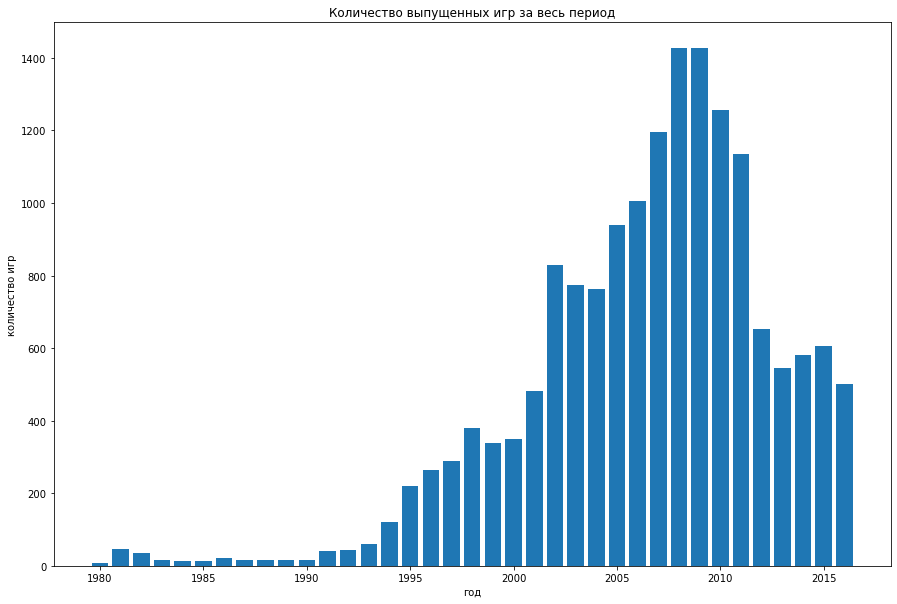

In [36]:
# применим функцию для отображения количества выпущенных игр за весь период

graph1 (
    (15, 10),
    years['year_of_release'],
    years['games'],
    'Количество выпущенных игр за весь период',
    'год',
    'количество игр'
)

In [37]:
# определим пиковые значения продаж

years.query('2008 <= year_of_release <= 2009')

,year_of_release,games
28,2008,1427
29,2009,1426


***Предварительный вывод:***

- Количество выпускаемых игр плавно росло с небольшими откатами, начиная с начала рассматриваемого периода (1980 г.)
- До 1995 г. показатель выпуска был незначителен (менее 200 игр в год), этот период можно не рассматривать при более глубоком исследовании данных
- В 1995 г. начался резкий рост: количество выпущенных игр преодолело отметку в 200 шт.
- Пик подъема пришелся на 2008-2009 гг. (более 1400 игр в год)
- Затем начался резкий спад игровой индустрии (совпал с мировым экономическим кризисом 2008-2009 гг.), который продолжался с небольшими колебаниями вплоть до 2013 г.
- В 2014-2015 гг. произошло небольшое оживление на рынке, и выпуск достиг значений на уровне 600 игр в год
- Но в 2016 г. опять наблюдалось снижение ниже этой отметки.

### Распределение продаж игр по платформам

In [38]:
# сгруппируем данные df по годам (с 1995 г.) и платформам, посчитаем суммарные продажи за каждый год

platforms = (
    df[df['year_of_release'] >= 1995]
    .groupby(by=['year_of_release', 'platform'], as_index=False)
    .agg({'total_sales': 'sum'})
)

platforms.head()

,year_of_release,platform,total_sales
0,1995,3DO,0.08
1,1995,GB,3.60
2,1995,NG,0.33
3,1995,PC,4.22
4,1995,PS,35.96


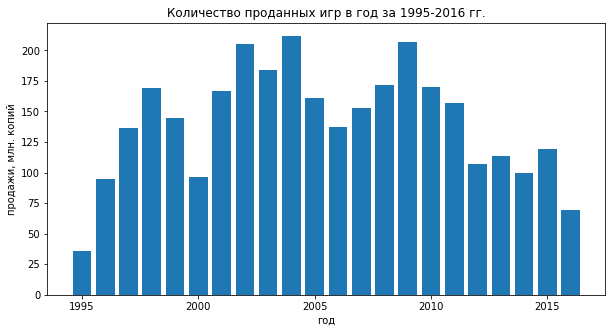

In [39]:
# визуализируем распределение проданных игр в год за 1995-2016 гг.

graph1 (
    (10, 5),
    platforms['year_of_release'],
    platforms['total_sales'],
    'Количество проданных игр в год за 1995-2016 гг.',
    'год',
    'продажи, млн. копий'
)

***Предварительный вывод:***
 - распределение данных по количеству проданных игр суммарно по всем платформам похоже на нормальное распределение

### Выделение топ-5 платформ по суммарным продажам

In [40]:
# создадим еще один датасэт с суммарным расчетом продаж по каждой платформе и количеством лет продаж 

platforms_sum = (
    platforms.groupby(by='platform', as_index=False)
    .agg({'total_sales': 'sum', 'year_of_release': 'count'})
    .rename(columns={'year_of_release': 'years_counts'})
)
        
platforms_sum.head()

,platform,total_sales,years_counts
0,3DO,0.08,1
1,3DS,257.81,6
2,DC,15.95,7
3,DS,802.76,10
4,GB,139.90,7


In [41]:
# создадим новый столбец для расчета средних продаж в год по каждой платформе
    
platforms_sum['mean_sales_per_year'] = round(platforms_sum['total_sales'] / platforms_sum['years_counts'], 2)

platforms_sum.head()

,platform,total_sales,years_counts,mean_sales_per_year
0,3DO,0.08,1,0.08
1,3DS,257.81,6,42.97
2,DC,15.95,7,2.28
3,DS,802.76,10,80.28
4,GB,139.90,7,19.99


In [42]:
# сгруппируем данные df по платформам за все годы (с 1995 г.), посчитаем суммарные продажи за все годы
# и выведем топ-5 таких платформ по продажам

top_5_platforms = platforms_sum.sort_values(by='total_sales').tail().reset_index()
top_5_platforms = top_5_platforms.drop(columns = ['index'], axis = 1)
top_5_platforms

,platform,total_sales,years_counts,mean_sales_per_year
0,DS,802.76,10,80.28
1,Wii,891.18,11,81.02
2,PS3,931.34,11,84.67
3,X360,961.24,12,80.10
4,PS2,1233.56,12,102.80


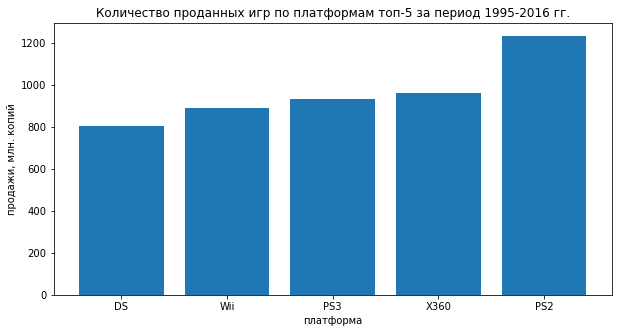

In [43]:
# визуализируем количество проданных игр по платформам топ-5 за период 1995-2016 гг.

graph1 (
    (10, 5),
    top_5_platforms['platform'],
    top_5_platforms['total_sales'],
    'Количество проданных игр по платформам топ-5 за период 1995-2016 гг.',
    'платформа',
    'продажи, млн. копий'
)

In [44]:
# выведем список топ-5 платформ по продажам

top_5 = top_5_platforms['platform'].unique()
top_5

array(['DS', 'Wii', 'PS3', 'X360', 'PS2'], dtype=object)

In [45]:
# отфильтруем изначальный датасэт platforms по списку топ-5 платформ

top_5_platforms_by_years = platforms[platforms['platform'].apply(lambda x: x in top_5)].reset_index(drop=True)

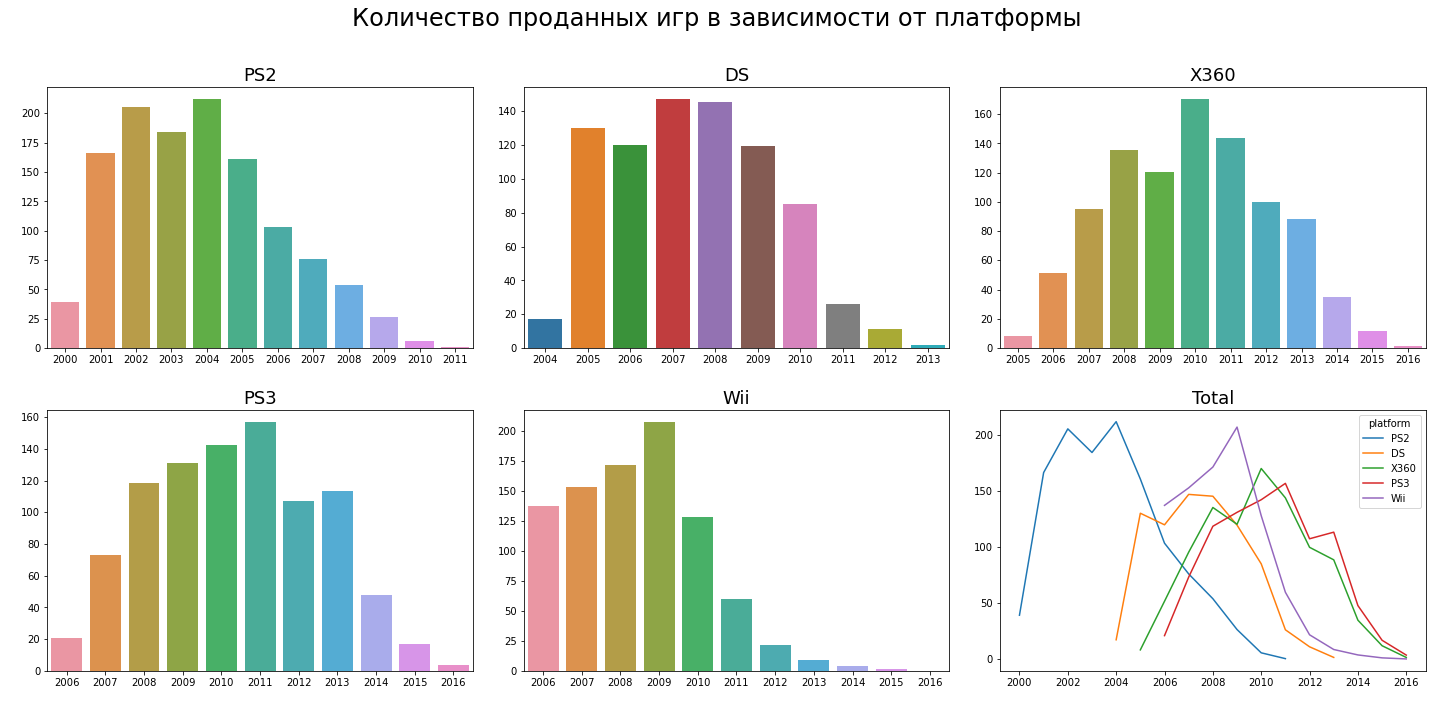

In [46]:
# отобразим объемы проданных игр по всем платфомам в годовом выражении

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Количество проданных игр в зависимости от платформы', fontsize=24)

x = 'year_of_release'
y = 'total_sales'
data = top_5_platforms_by_years

for i in enumerate(data['platform'].unique()):
    row, col = divmod(i[0], 3)
    sns.barplot(ax=axes[row, col], data=data[data['platform'] == i[1]], x=x, y=y)
    axes[row, col].set_title('{}'.format(i[1]), fontsize=18)
    axes[row, col].set_xlabel(' ')
    axes[row, col].set_ylabel(' ')
    

sns.lineplot(ax=axes[1, 2], data=data, x=x, y=y, hue='platform')
axes[1, 2].set_title('Total',  fontsize=18)
axes[1, 2].set_xlabel(' ')
axes[1, 2].set_ylabel(' ')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

***Предварительный вывод:***
- **Абсолютным лидером продаж по количеству игр является платформа PS2**
- Суммарно за 12 лет на ней было продано более 1,2 млрд. копий, а за каждый год - в среднем более 100 млн. копий
- По остальным лидерам индустрии суммарный объем продаж колеблется в диапазоне от 800 млн. до порядка 1 млрд. копий (или 80-85 млн. копий в год)
- По всем топ-5 платформам форма распределения продаж похожа: сначала продажи растут, а примерно в середине цикла начинают снижаться
- Нужно посчитать среднюю продолжительность жизни платформы по всем платформам
- А затем разделить эту продолжительность на 2 (найти середину) - это и будет "актуальный период", после которого начинается спад продаж по платформе в среднем, и по которому можно будет прогнозировать, в какой фазе продаж сейчас находится та или иная платформа (рост, пик, спад)

### Определение срока жизни платформы и "актуального периода" для построения прогноза

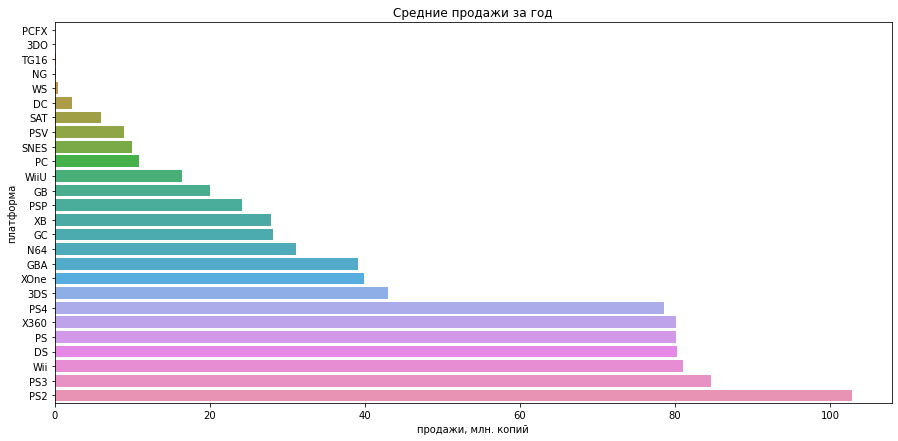

In [47]:
# построим график средних продаж по платформам на горизонтальной диаграмме

plt.figure(figsize = (15, 7))
data=platforms_sum.sort_values(by='mean_sales_per_year')
sns.barplot(x=data['mean_sales_per_year'], y=data['platform'], ci=None)
plt.title('Средние продажи за год')
plt.xlabel('продажи, млн. копий')
plt.ylabel('платформа')
plt.show()

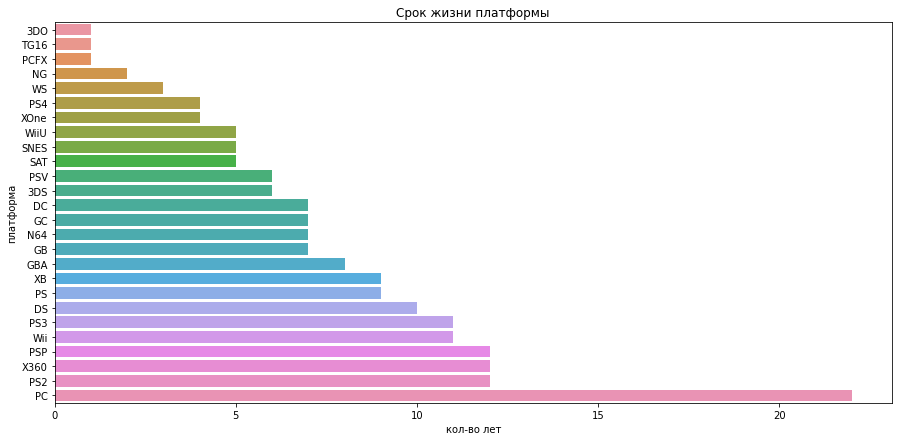

In [48]:
# построим график срока жизни платформ на горизонтальной диаграмме

data=platforms_sum.sort_values(by='years_counts')
plt.figure(figsize = (15, 7))
sns.barplot(x=data['years_counts'], y=data['platform'], ci=None)
plt.title('Срок жизни платформы')
plt.xlabel('кол-во лет')
plt.ylabel('платформа')
plt.show()

In [49]:
# отфильтруем платформы со средними продажами в год менее 10 млн. копий игр (как незначимые для выборки)
# а также со сроком жизни меньше 20 лет (срежем выброс)
# посчитаем медиану по количеству лет продажи по оставшимся платформам = средний срок жизни платформы

time_living_platform = (
    round(platforms_sum[(platforms_sum['mean_sales_per_year'] > 10) &
    (platforms_sum ['years_counts']  < 20)]['years_counts'].median())
)

print('Средний срок жизни платформы:', time_living_platform, 'лет')

Средний срок жизни платформы: 8 лет


Поскольку на большинстве графиков распределения продаж по топ-5 плафтормам пик продаж приходится на середину цикла, то для определения актуального периода прогнозирования развития платформ разделим медиану по сроку жизни пополам

In [50]:
# разделим время жизни платформы пополам и получим т.н. "актуальный период" для прогнозирования

actual_period = round(time_living_platform / 2)
print('Актуальный период для прогнозирования:', actual_period, 'года')

Актуальный период для прогнозирования: 4 года


Расчет актуального периода времени позволит далее провести анализ на предмет поиска перспективных платформ

***Предварительный вывод:***
 - средний срок жизни платформы составляет 8 лет
 - актуальный период для прогнозирования - 4 года

### Распределение продаж по топ-5 платформам в 2013-2016 гг. и определение перспективных платформ

In [51]:
# создадим еще один датасэт c суммарными продажами по платформам, начиная с 2013 г.

platforms_sum_2013 = (
    platforms[platforms['year_of_release'] >= 2013]
    .groupby(by='platform', as_index=False)
    .agg({'total_sales': 'sum', 'year_of_release': 'count'})
    .rename(columns={'year_of_release': 'years_counts'})
)
        
# создадим новый столбец для расчета средних продаж в год по каждой платформе
    
platforms_sum_2013['mean_sales_per_year'] = (
    round(platforms_sum_2013['total_sales'] /
          platforms_sum_2013['years_counts'], 2)
)

# сгруппируем данные по платформам с 2013 г., посчитаем суммарные продажи
# и выведем топ-5 таких платформ по продажам

top_5_platforms_2013 = platforms_sum_2013.sort_values(by='total_sales').tail().reset_index()
top_5_platforms_2013 = top_5_platforms_2013.drop(columns = ['index'], axis = 1)
top_5_platforms_2013

,platform,total_sales,years_counts,mean_sales_per_year
0,X360,136.80,4,34.20
1,3DS,143.25,4,35.81
2,XOne,159.32,4,39.83
3,PS3,181.43,4,45.36
4,PS4,314.14,4,78.54


In [52]:
# выведем список топ-5 платформ по продажам с 2013 г.

top_5_2013 = top_5_platforms_2013['platform'].unique()

# отфильтруем изначальный датасэт platforms по списку топ-5 платформ в 2013-2016 гг.

top_5_platforms_2013_by_years = (
    platforms[(platforms['platform']
    .apply(lambda x: x in top_5_2013)) &
    (platforms['year_of_release'] >= 2013)]
)

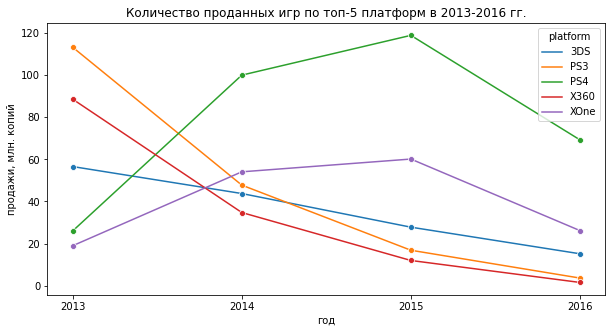

In [53]:
# посмотрим, как выглядят графики по продажам топ-5 платформ на одном графике

data = top_5_platforms_2013_by_years
plt.figure(figsize = (10, 5))
sns.lineplot(y='total_sales', x='year_of_release', data=data, hue='platform', marker='o')
plt.title('Количество проданных игр по топ-5 платформ в 2013-2016 гг.')
plt.xlabel('год')
plt.ylabel('продажи, млн. копий')
plt.xticks(data['year_of_release'].unique()) 
plt.show()

- Список новых лидеров (в 2013-2016 гг.) отличается от предыдущего среза
- Из "старых лидеров" остались только платформы PS3 и X360, но по ним, как и еще по оной платформе (3DS), наблюдается устойчивое снижение в актуальном периоде
- Более-менее перпективными выглядят PS4 и XOne, по которым нет резкого снижения после пика 2015 года

In [54]:
top_5_platforms_2013_by_years[top_5_platforms_2013_by_years['platform'].apply(lambda x: x in ['XOne', 'PS4'])]['year_of_release'].unique()

array([2013, 2014, 2015, 2016], dtype=int64)

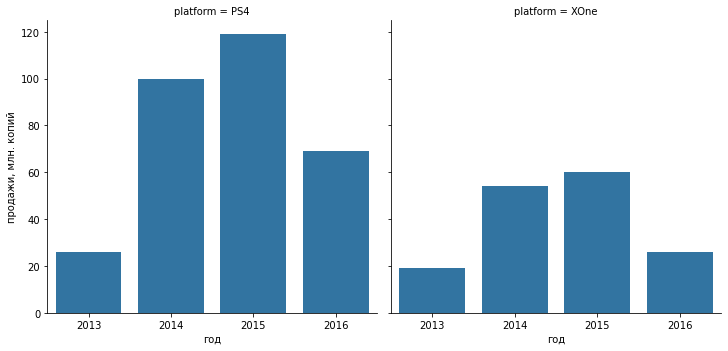

In [55]:
# построим гистограммы проданных игр по перспективным платформам по одной оси

data=top_5_platforms_2013_by_years[top_5_platforms_2013_by_years['platform'].apply(lambda x: x in ['XOne', 'PS4'])]

(
    sns.FacetGrid(data, col='platform', height=5, col_wrap=3)
    .map(sns.barplot, 'year_of_release', 'total_sales', order=data['year_of_release'].unique())
    .set_axis_labels('год', 'продажи, млн. копий')
)

#plt.tight_layout()
plt.show()

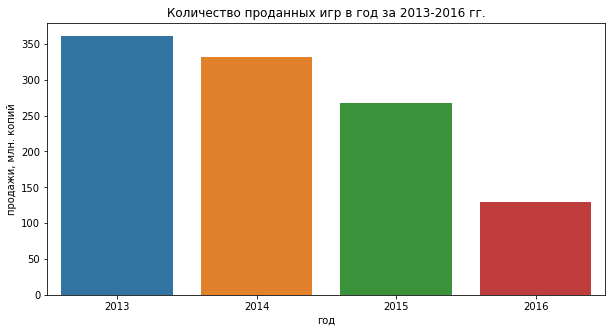

In [56]:
# построим диаграмму общего распределения продаж по всем платформам за последние 4 года

data=platforms[platforms['year_of_release'] >= 2013].groupby(by='year_of_release').agg({'total_sales': 'sum'}).reset_index()
plt.figure(figsize = (10, 5))
sns.barplot(x='year_of_release', y='total_sales', data=data, ci=None)
plt.title('Количество проданных игр в год за 2013-2016 гг.')
plt.xlabel('год')
plt.ylabel('продажи, млн. копий')
plt.show()

- По гистограммам явно вырисовываются **2 перспективные платформы: PS4 и XOne**
- По этим 2-м платформам срок жизни еще совсем небольшой (по 4 года) и наблюдается рост продаж (за исключением 2016 г., но это провальный год для большинства платформ, возможно из-за того, что данные по этому году могут быть неполными)
- Можно предположить, что в дальнейшем по этим платформам может наблюдаться рост в течение еще какого-то времени, или как-минимум стабилизация продаж на уровне 2016 г., если платформа находится уже вблизи пика развития

In [57]:
# добавим столбец с долей каждой платформы в суммарных продажах топ-5 платформ в старый и новый датасэты

top_5_platforms['share_sales'] = round(top_5_platforms['total_sales'] / top_5_platforms['total_sales'].sum(), 2)
top_5_platforms_2013['share_sales'] = (
    round(top_5_platforms_2013['total_sales'] /
    top_5_platforms_2013['total_sales'].sum(), 2)
)
    
top_5_platforms_2013

,platform,total_sales,years_counts,mean_sales_per_year,share_sales
0,X360,136.80,4,34.20,0.15
1,3DS,143.25,4,35.81,0.15
2,XOne,159.32,4,39.83,0.17
3,PS3,181.43,4,45.36,0.19
4,PS4,314.14,4,78.54,0.34


In [58]:
top_5_platforms

,platform,total_sales,years_counts,mean_sales_per_year,share_sales
0,DS,802.76,10,80.28,0.17
1,Wii,891.18,11,81.02,0.18
2,PS3,931.34,11,84.67,0.19
3,X360,961.24,12,80.10,0.20
4,PS2,1233.56,12,102.80,0.26


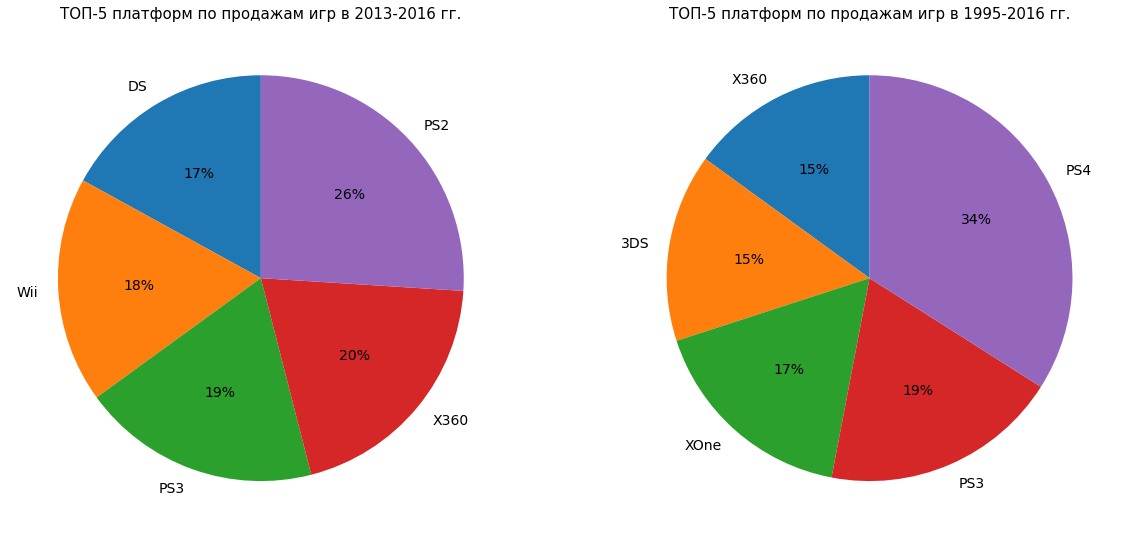

In [59]:
# нарисуем круговые диаграммы топ-5 платформ старых и новых лидеров рынка

labels = top_5_platforms['platform']
data = top_5_platforms['share_sales']
labels2 = top_5_platforms_2013['platform']
data2 = top_5_platforms_2013['share_sales']

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(data, labels=labels, autopct='%1.0f%%', startangle=90, textprops={'fontsize': 14})
ax1.set_title('ТОП-5 платформ по продажам игр в 2013-2016 гг.', fontsize=15)
ax2.pie(data2, labels=labels2, autopct='%1.0f%%', startangle=90 , textprops={'fontsize': 14})
ax2.set_title('ТОП-5 платформ по продажам игр в 1995-2016 гг.', fontsize=15)
plt.show()

***Предварительный вывод:***
- По датасэту видно, что если выбирать из 2-х наиболее перспективных платформ, то **PS4 все же перспективнее**, чем XOne	, поскольку за 4 года своего существования средние продажи платформы находятся на уровне чуть ниже  80  млн. копий в год; по XOne средние продажи почти в 2 раза ниже - порядка 40 млн. копий в год
- К тому же PS4 является преемницей предыдущих платформ компании Sony: PS3 и PS2, продажи которых суммарно составляют 45% в топ-5 за длинный период наблюдений (1995-2016 гг.), что означает, что у PS4 еще есть потенциал для увеличения роста внутри холдинга путем занятия ниш PS3 и PS2

### Определение размаха глобальных продаж в разбивке по топ-5 платформ

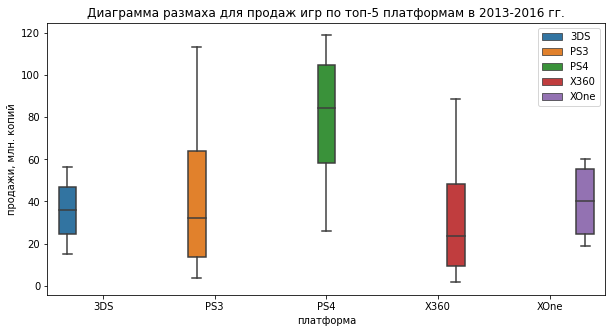

In [60]:
# boxplot по топ-5 платформ

data = top_5_platforms_2013_by_years
plt.figure(figsize = (10, 5))
sns.boxplot(y='total_sales', x='platform', data=data, hue='platform')
plt.title('Диаграмма размаха для продаж игр по топ-5 платформам в 2013-2016 гг.')
plt.xlabel('платформа')
plt.ylabel('продажи, млн. копий')
plt.legend(loc='best')
plt.show()

In [61]:
top_5_platforms_2013_by_years[top_5_platforms_2013_by_years['platform'] == 'PS4']['total_sales'].describe()

count      4.000000
mean      78.535000
std       40.567917
min       25.990000
25%       58.435000
50%       84.625000
75%      104.725000
max      118.900000
Name: total_sales, dtype: float64

In [62]:
top_5_platforms_2013_by_years[top_5_platforms_2013_by_years['platform'] == 'PS3']['total_sales'].describe()

count      4.000000
mean      45.357500
std       48.898675
min        3.600000
25%       13.515000
50%       32.290000
75%       64.132500
max      113.250000
Name: total_sales, dtype: float64

***Предварительный вывод:***

- Самый большой разброс продаж по играм за рассматриваемый период у платформ-лидеров (по суммарной величине продаж и среднему числу продаж за год) производителя Sony: PS4 и PS3 - порядка 90-100 млн. копий (разница между максимальными и минимальными продажами)
- По остальным платформам из топ-5 разброс существенно ниже

### Определение влияния отзывов пользователей и критиков на продажи на примере платформы PS4

In [63]:
top_5_platforms_2013

,platform,total_sales,years_counts,mean_sales_per_year,share_sales
0,X360,136.80,4,34.20,0.15
1,3DS,143.25,4,35.81,0.15
2,XOne,159.32,4,39.83,0.17
3,PS3,181.43,4,45.36,0.19
4,PS4,314.14,4,78.54,0.34


In [64]:
# создадим отдельный датасэт для платформы PS4
# отфильруем значения -1 (пропуски, ошибки) по году  и оценкам критиков и пользователей

PS4 = (
    df[(df['platform'] == 'PS4') & (df['critic_score'] > 0) &
    (df['user_score'] > 0) & (df['year_of_release'] >= 2013)]
    [['year_of_release','critic_score', 'user_score', 'total_sales']]
)

PS4.head() 

,year_of_release,critic_score,user_score,total_sales
42,2014,97.0,8.3,12.62
77,2015,82.0,4.3,8.58
92,2014,83.0,5.7,7.66
94,2016,85.0,5.0,7.60
105,2015,87.0,6.5,7.17


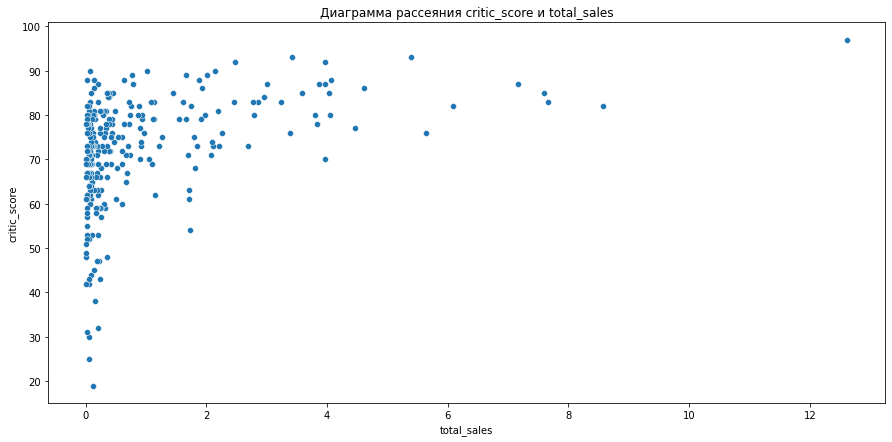

In [65]:
# оценим степень корреляции critic_score и total_sales по диаграмме рассеяния 

plt.figure(figsize = (15, 7))
sns.scatterplot(x='total_sales', y='critic_score', data=PS4)
plt.title('Диаграмма рассеяния critic_score и total_sales')
plt.show()

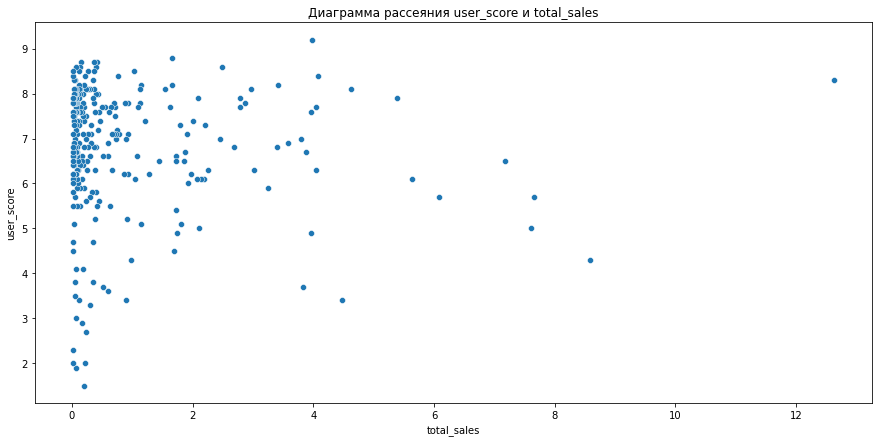

In [66]:
# оценим степень корреляции user_score и total_sales по диаграмме рассеяния 

plt.figure(figsize = (15, 7))
sns.scatterplot(x='total_sales', y='user_score', data=PS4)
plt.title('Диаграмма рассеяния user_score и total_sales')
plt.show()

- Диаграммы рассеяния показывают, что между продажами и оценками критиков и пользователей корреляция слабая
- Проверим это статистически, посчитав корреляцию по PS4, а заодно и по остальным лидерам

In [67]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No rating,31.38


In [68]:
# создадим отдельные датасэты по оставшимся платформам из топ-5

X360 = (
    df[(df['platform'] == 'X360') & (df['critic_score'] > 0) & (df['user_score'] > 0) & (df['year_of_release'] >= 2013)]
    [['year_of_release','critic_score', 'user_score', 'total_sales']]
)

_3DS = (
    df[(df['platform'] == '3DS') & (df['critic_score'] > 0) & (df['user_score'] > 0) & (df['year_of_release'] >= 2013)]
    [['year_of_release','critic_score', 'user_score', 'total_sales']]
)

XOne = (
    df[(df['platform'] == 'XOne') & (df['critic_score'] > 0) & (df['user_score'] > 0) & (df['year_of_release'] >= 2013)]
    [['year_of_release','critic_score', 'user_score', 'total_sales']]
)

PS3 = (
    df[(df['platform'] == 'PS3') & (df['critic_score'] > 0) & (df['user_score'] > 0) & (df['year_of_release'] >= 2013)]
)

In [69]:
#  сделаем таблицу с корреляцией между продажами и оценками для всех топ-5 платформ

index=top_5_2013
data = (
    [list(X360.loc[:, ['total_sales', 'critic_score', 'user_score']].corr()['total_sales'][1:]),
    list(_3DS.loc[:, ['total_sales', 'critic_score', 'user_score']].corr()['total_sales'][1:]),
    list(XOne.loc[:, ['total_sales', 'critic_score', 'user_score']].corr()['total_sales'][1:]),
    list(PS3.loc[:, ['total_sales', 'critic_score', 'user_score']].corr()['total_sales'][1:]),
    list(PS4.loc[:, ['total_sales', 'critic_score', 'user_score']].corr()['total_sales'][1:])]
)

columns = ['critic_score', 'user_score']        
corr_top_5 = pd.DataFrame(index=index, data=data, columns=columns)
corr_top_5

,critic_score,user_score
X360,0.241520,-0.011742
3DS,0.299439,0.258891
XOne,0.407171,-0.063838
PS3,0.212197,0.005650
PS4,0.400903,-0.032459


***Предварительный вывод:***

- Расчет корреляции подтверждает то, что по платформе PS4 зависимость между продажами и оценками критиков и пользователей слабая
- По остальным платформам наблюдается такая же картина

### Определение влияния игровых жанров на продажи по платформам

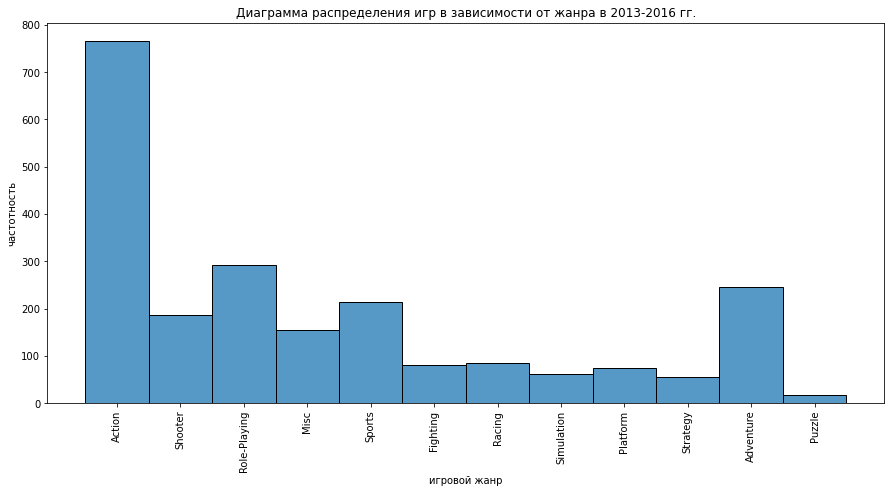

In [70]:
# построим гистограмму общего распределения игр в зависимости от жанра с 1995 г.

plt.figure(figsize = (15, 7))
sns.histplot(x='genre', data=df[df['year_of_release'] >= 2013])
plt.xticks(rotation=90)
plt.title('Диаграмма распределения игр в зависимости от жанра в 2013-2016 гг.')
plt.xlabel('игровой жанр')
plt.ylabel('частотность')
plt.show()

- Чаще всего встречаются игры с жанром: Action и Role-Playing, наименее популярные: Puzzle и Strategy
- Теперь посмотрим на суммарные продажи игр по жанрам

In [71]:
# сгруппируем данные df по годам (с 2013 г.) и игровым жанрам, посчитаем суммарные и средние продажи за каждый год

genres = (
    df[df['year_of_release'] >= 2013]
    .groupby(by=['genre'], as_index=False)
    .agg({'total_sales': 'sum'})
    .reset_index().drop(columns='index')
    .sort_values(by='total_sales')
)

genres['mean_sales'] = round(genres['total_sales'] / 4, 2)
genres = genres.reset_index().drop(columns='index')
genres

,genre,total_sales,mean_sales
0,Puzzle,3.17,0.79
1,Strategy,10.08,2.52
2,Simulation,21.76,5.44
3,Adventure,23.64,5.91
4,Fighting,35.31,8.83
5,Racing,39.89,9.97
6,Platform,42.63,10.66
7,Misc,62.82,15.70
8,Role-Playing,145.89,36.47
9,Sports,150.65,37.66


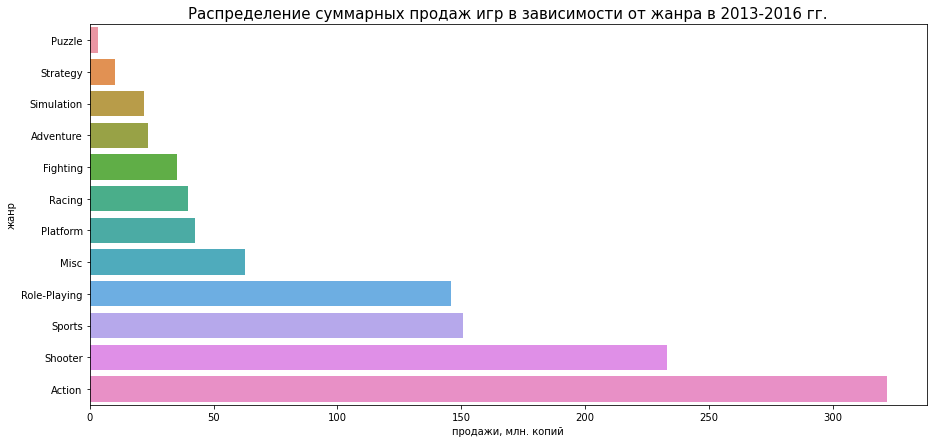

In [72]:
# построим диаграмму суммарных продаж игр по всем видам жанров

plt.figure(figsize = (15, 7))
sns.barplot(x='total_sales', y='genre', data=genres, ci=None)
plt.title('Распределение суммарных продаж игр в зависимости от жанра в 2013-2016 гг.', fontsize=15)
plt.xlabel('продажи, млн. копий')
plt.ylabel('жанр')
plt.show()

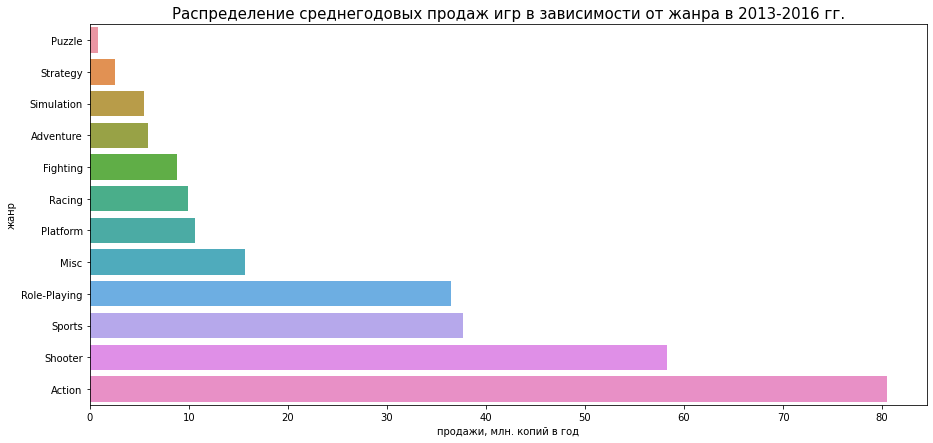

In [73]:
# построим диаграмму среднегодовых продаж игр по всем видам жанров

data=genres.sort_values(by=('mean_sales'))
plt.figure(figsize = (15, 7))
sns.barplot(x='mean_sales', y='genre', data=data, ci=None)
plt.title('Распределение среднегодовых продаж игр в зависимости от жанра в 2013-2016 гг.', fontsize=15)
plt.xlabel('продажи, млн. копий в год')
plt.ylabel('жанр')
plt.show()

***Предварительный вывод:***
- Чаще всего встречаются игры с жанром: Action и Role-Playing, наименее популярные: Puzzle и Strategy
- По суммарным продажам за весь рассматриваемый период лидируют Action и Shooter: порядка 320 и 230 млн. копий соответственнно, аутсайдеры - puzzle и strategy:10 и менее млн. копий
- По среднегодовым продажам игр по жанрам, естественно, те же лидеры и аутсайдеры

### Вывод 3

1) **Распределение количества выпущенных игр в 1980-2016 гг. можно описать следующим образом**:
 - до 1995 г. показатель выпуска был незначителен (менее 200 игр в год), данные до этого периода можно не рассматривать при более глубоком исследовании
 - начиная с 1995 г. начался резкий подъем, пик которого пришелся на 2008-2009 гг. (более 1400 игр в год)
 - затем началось резкое снижение выпуска в игровой индустрии (совпал с мировым экономическим кризисом 2008-2009 гг.)
 - в 2014-2015 гг. спад сменился небольшим оживлением на рынке (выпуск достиг значений на уровне 600 игр в год)
 - в 2016 г. производство игр вновь несколько снизилось (возможно, из-за того, что в 2016 г. учтены данные не за полный год)

2) **Распределение продаж игр в 1995-2016 гг. можно описать следующим образом**:
 - данные по количеству проданных игр суммарно по всем платформам распределены нормально
 - **абсолютным лидером продаж по количеству игр являлась платформа PS2:**
  + суммарно за 12 лет на ней было продано более 1,2 млрд. копий, а за каждый год - в среднем более 100 млн. копий
  + по остальным лидерам индустрии суммарный объем продаж колеблется в диапазоне от 800 млн. до порядка 1 млрд. копий (или 80-85 млн. копий в год)
 - средний срок жизни платформы составляет 8 лет, а **актуальный период**, на основе которого можно найти перспективные платформы, составляет 4 года
 - самый большой разброс продаж по играм за актуальный период у платформ-лидеров (по суммарной величине продаж и среднему числу продаж за год) производителя Sony: PS4 и PS3 - порядка 90-100 млн. копий (разница между максимальными и минимальными продажами)

3) **Определение перспективных платформ:**
 - лидерами продаж за актуальный период являются 2 платформы компании Sony: PS4 и PS3
 - по графикам продаж вырисовываются **2 перспективные платформы: PS4 и XOne**
 - срок жизни по платформам еще совсем небольшой (по 4 года) и наблюдается рост продаж (за исключением 2016 г. данные по которому могут быть неполными)
 - можно предположить, что в дальнейшем по этим платформам может наблюдаться рост в течение еще какого-то времени, или как-минимум стабилизация продаж на уровне 2016 г., если платформа находится уже вблизи пика развития
 - если выбирать из 2-х наиболее перспективных платформ, то **PS4 все же перспективнее**, чем XOne: 
    + средние продажи PS4 находятся на уровне чуть ниже  80  млн. копий в год; по XOne средние продажи почти в 2 раза ниже - порядка 40 млн. копий в год
    + PS4 является преемницей предыдущих платформ линейки Playstation (продажи PS3 и PS2, продажи которых суммарно составляют 45% в топ-5 платформ на более длинном отрезке времени), и у нее есть потенциал для увеличения роста внутри холдинга путем занятия ниши еще присуствующей на рынке PS3
    
4) **Факторы, влияющие на продажи игр:**
 - отзывы критиков и пользователей оказывают слабое влияние на продажи (слабая корреляция подтверждается статистически и графически)
 - **игровой жанр существенно влияет на продажи:** по суммарным и среднегодовым продажам за расссматривамый период лидируют Action и Shooter (суммрно: порядка 320 и 230 млн. копий соответственнно), аутсайдеры - Puzzle и Strategy (суммарно: 10 и менее млн. копий)

## Составляение характерного портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Определение самых популярных платформ в разрезе регионов продаж

In [74]:
# создадим отдельный датасэт по продажам на различных платформах в различных регионах

region_sales = (
    df[df['year_of_release'] >= 2013]
    .groupby(by=['platform'], as_index=False)
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', 'other_sales': 'sum'})
    .set_index('platform')
)
            
region_sales.tail(10)

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
DS,0.57,0.85,0.00,0.12
PC,11.11,25.36,0.00,2.96
PS3,63.50,67.81,23.35,26.77
PS4,108.74,141.09,15.96,48.35
PSP,0.00,0.17,3.29,0.04
PSV,5.04,6.10,18.59,3.26
Wii,6.56,5.93,0.05,1.12
WiiU,29.21,19.85,10.88,4.69
X360,81.66,42.52,0.51,12.11


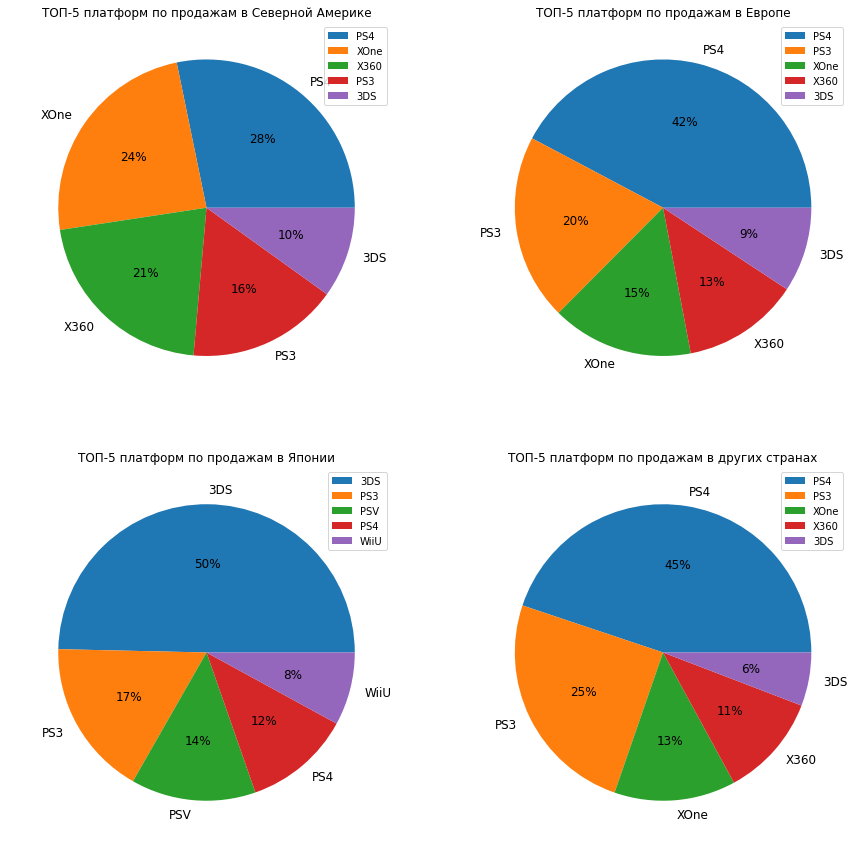

In [75]:
# пройдемся циклом по регионам и выводем круговые диаграммы по продажам топ-5 платформ в конкретном регионе

area = region_sales.columns
area_names = ['Северной Америке', 'Европе', 'Японии', 'других странах']
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

for i in range(0, 4):
    
    (region_sales.nlargest(5, columns=area[i])
        .plot(y=area[i], kind='pie', figsize=(15, 15),
        ax=axes[i//2][i%2], autopct='%1.0f%%', fontsize=12, title='ТОП-5 платформ по продажам в ' + area_names[i], ylabel=' ')
    )

- Круговые диаграммы хорошо показывают доли отдельных платформ на каждом рынке: например, в Северной Америке лидер - PS4 (28%), в Европе - также PS4 (42%), а в Японии - 3DS (50%) и т.д.
- Но если сгруппировать платформы по производителю, база для сравнения будет более полная и понятная, поскольку настоящая конкуренция разворачивается между разными производителями, а не их брендами

In [76]:
# создадим отдельные переменные по продажам по каждому региону

na_sales = (
    region_sales[['na_sales']]
    .sort_values(by='na_sales').tail()
    .rename(columns={'na_sales':'sales'})
)

eu_sales = (
    region_sales[['eu_sales']]
    .sort_values(by='eu_sales').tail()
    .rename(columns={'eu_sales':'sales'})
)

jp_sales = (
    region_sales[['jp_sales']]
    .sort_values(by='jp_sales').tail()
    .rename(columns={'jp_sales':'sales'})
)

In [77]:
# cоздадим датафрейм с долями производителей по регионам: для этого создадим отельные переменные по каждой доле

nintendo_na = round(na_sales.loc['3DS'] / na_sales.sum(), 2)[0]

playstation_na = round((na_sales.loc['PS4'] + na_sales.loc['PS3']) / na_sales.sum(), 2)[0]

xbox_na = round((na_sales.loc['X360'] + na_sales.loc['XOne']) / na_sales.sum(), 2)[0]

In [78]:
nintendo_eu = round(eu_sales.loc['3DS'] / eu_sales.sum(), 2)[0]

playstation_eu = round((eu_sales.loc['PS4'] + eu_sales.loc['PS3']) / eu_sales.sum(), 2)[0]

xbox_eu = round((eu_sales.loc['X360'] + eu_sales.loc['XOne']) / eu_sales.sum(), 2)[0]

In [79]:
nintendo_jp = round((jp_sales.loc['WiiU'] + jp_sales.loc['3DS']) / jp_sales.sum(), 2)[0]

playstation_jp = round((jp_sales.loc['PS4'] + jp_sales.loc['PS3'] + jp_sales.loc['PSV']) / jp_sales.sum(), 2)[0]

xbox_jp = 0

In [80]:
producer = (pd.DataFrame(
    columns=['NA', 'EU', 'JP'],
    index=['playstation', 'nintendo', 'xbox'],
    data=[
    [playstation_na, playstation_eu, playstation_jp],
    [nintendo_na, nintendo_eu, nintendo_jp],
    [xbox_na, xbox_eu, xbox_jp]
    ])).T

producer

,playstation,nintendo,xbox
NA,0.45,0.10,0.45
EU,0.63,0.09,0.28
JP,0.42,0.58,0.00


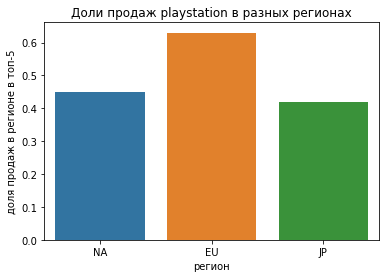

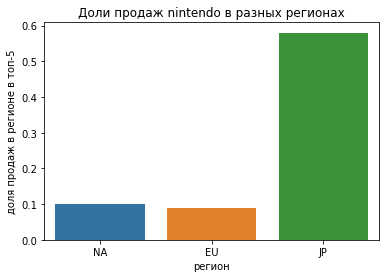

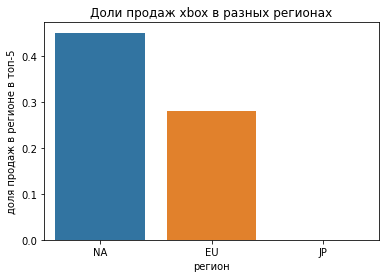

In [81]:
data=producer

for i in data.columns:
    sns.barplot(x=data.index, y=data[i], data=data)
    plt.title('Доли продаж ' + i + ' в разных регионах')
    plt.xlabel('регион')
    plt.ylabel('доля продаж в регионе в топ-5')
    plt.show()

***Предварительный вывод:***

- Вот теперь хорошо видно, что, если рассматривать в каждом регионе топ-5 платформ, то лидеры продаж выделяются в зависимости от региона: в Северной Америке и Европе лидер по продажам - компания Playstation (PS3, PS4, PSV) - 45% и 63% соответственно, на втором месте Xbox (X360, XOne) - 45% и 28% соответственно, а Nintendo (3DS, WiiU) занимает лишь 3-е место - 10% и 9% соответственно, в то время как в Японии последний производитель, наоборот, лидирует с результатом в 58%
- Но можно выделить и общую тенденцию: во всех регионах лидируют именно японские производители (Playstation и Nintendo), а в частности в Японии они вообще занимают весь рынок топ-5-платформ

### Определение самых популярных жанров в разрезе регионов продаж

In [82]:
# создадим отдельный датасэт по продажам в разрезе игровых жанров в различных регионах

genre_sales = (
    df[df['year_of_release'] >= 2013]
    .groupby(by=['genre'], as_index=False)
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum','other_sales': 'sum'})
    .set_index('genre')
)
            
genre_sales

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,126.05,118.13,40.49,37.20
Adventure,7.14,8.25,5.82,2.43
Fighting,15.55,8.55,7.65,3.56
Misc,27.49,20.04,9.20,6.09
Platform,18.14,15.58,4.79,4.12
Puzzle,0.83,1.00,1.18,0.16
Racing,12.96,20.19,2.30,4.44
Role-Playing,46.40,36.97,51.04,11.48
Shooter,109.74,87.86,6.61,28.77


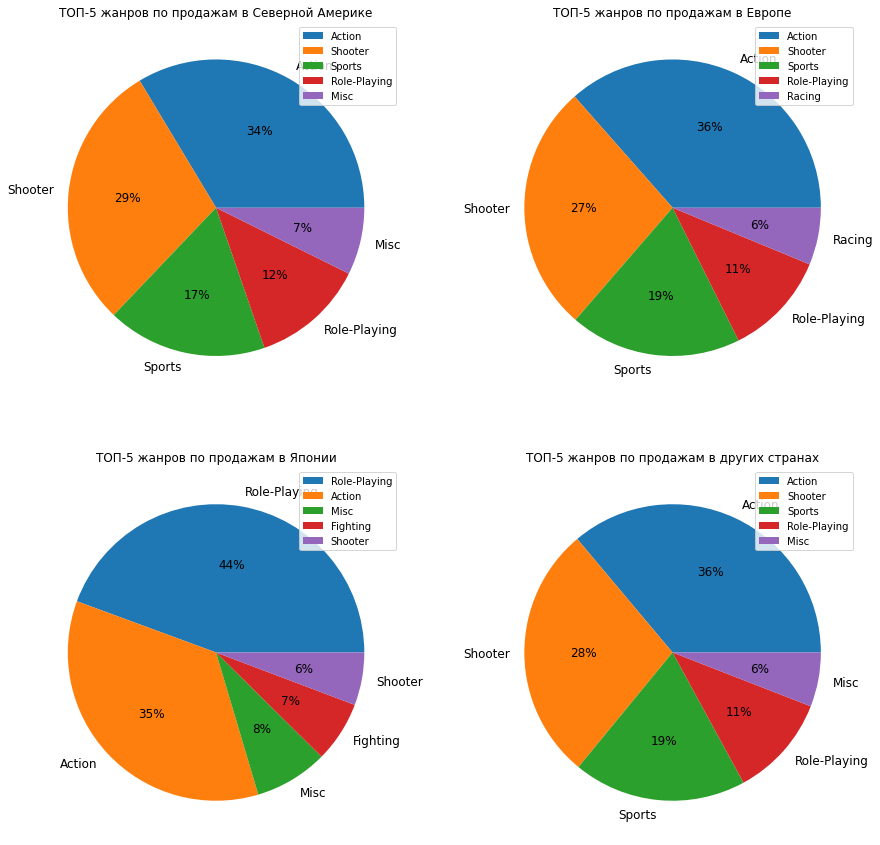

In [83]:
# пройдемся циклом по жанрам и выводем круговые диаграммы по продажам топ-5 жанров в конкретном регионе

area = genre_sales.columns
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

for i in range(0, 4):
    
    (genre_sales.nlargest(5, columns=area[i])
        .plot(y=area[i], kind='pie', figsize=(15, 15),
        ax=axes[i//2][i%2], autopct='%1.0f%%', fontsize=12, title='ТОП-5 жанров по продажам в ' + area_names[i], ylabel=' ')
    )

***Предварительный вывод:***

- По жанровым предпочтениям пользователи в Северной Америке и Европе очень похожи друг на друга, а также на среднего мирового пользователя:
  - топ-5 по жанрам в 2-х регионах совпадают по долям до нескольких процентов
  - лидеры мировых продаж: Action и Shooter также являются лидерами продаж в Европе и Северной Америке (от 27 до 36% в топ-5 жанров по продажам)
- Предпочтения японских пользователей отличаются от европейских и американских пользователей главным образом тем, что здесь с большим отрывом лидирует жанр Role-Playing (44% в топ-5 жанров по продажам), а затем уже идет один из традиционных лидеров - Action (5%)
- Видимо, такие различия в жанровых предпочтениях можно объяснить разницой западных и восточных менталитетов и традиций, которые, естественно, отражаются и на потребительских предпочтениях

### Влияние рейтинга ESRB на продажи в отдельном регионе   

In [84]:
# создадим отдельный датасэт по продажам в разрезе рейтингов ESRB в различных регионах

rating_sales = (
    df[df['year_of_release'] >= 2013]
    .groupby(by=['rating'], as_index=False)
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum','other_sales': 'sum'})
    .set_index('rating')
)
            
rating_sales

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,79.05,83.36,15.14,22.61
E10+,54.24,42.69,5.89,12.57
M,165.21,145.32,14.11,47.04
No rating,89.42,78.91,85.05,23.46
T,49.79,41.95,20.59,14.29


In [85]:
rating_sales.index.unique()

Index(['E', 'E10+', 'M', 'No rating', 'T'], dtype='object', name='rating')

In [86]:
# создадим словарь с расшифровкой рейтингов ESRB

genre_dict = (
    {'AO': 'только для взрослых от 18 лет', 'E': 'для всех от 6 лет', 'E10+': 'для всех от 10 лет',
    'EC': 'для детей младшего возраста', 'K-A': 'для детей и взрослых от 6 лет и старше',
    'M': 'для взрослых от 17 лет', 'RP': 'рейтинг ожидается', 'T': 'подросткам от 13 лет',
    'No rating': 'без рейтинга'}
)

genre_dict = pd.DataFrame.from_dict(genre_dict, orient='index').rename(columns={0:'расшифровка рейтинга'})
genre_dict

,расшифровка рейтинга
AO,только для взрослых от 18 лет
E,для всех от 6 лет
E10+,для всех от 10 лет
EC,для детей младшего возраста
K-A,для детей и взрослых от 6 лет и старше
M,для взрослых от 17 лет
RP,рейтинг ожидается
T,подросткам от 13 лет
No rating,без рейтинга


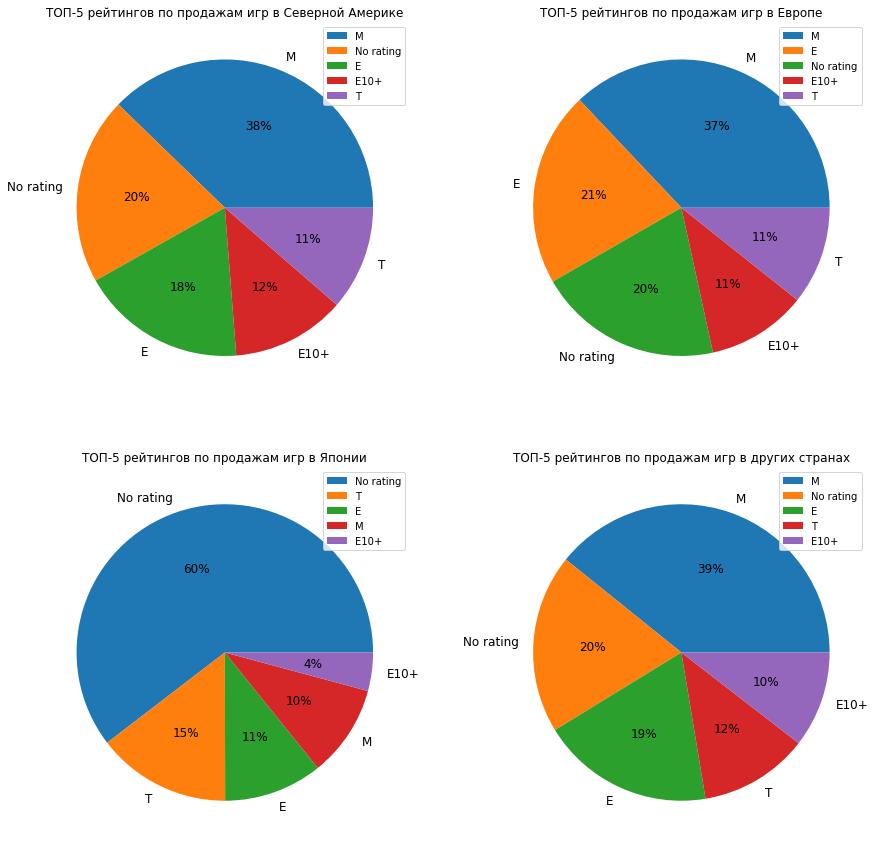

In [87]:
# пройдемся циклом по рейтингам и выводем круговые диаграммы по продажам топ-5 рейтингов в конкретном регионе

area = rating_sales.columns
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

for i in range(0, 4):
    
    (rating_sales.nlargest(5, columns=area[i])
        .plot(y=area[i], kind='pie', figsize=(15, 15),
        ax=axes[i//2][i%2], autopct='%1.0f%%', fontsize=12, title='ТОП-5 рейтингов по продажам игр в ' + area_names[i], ylabel=' ')
    )

***Предварительный вывод:***

- Как и с жанрами по категориям рейтингов ESRB есть явные региональные отличия
- Большинство игр в Северной Америке и Европе продаются под маркировкой для взрослых от 17 лет: от 38% и 37% соответственно в топ-5 категорий рейтингов по продажам
- Следующие категории наиболее продаваемых игр для западных потребителей - это игры с рейтингом для всех от 6 лет или без рейтинга: порядка 20%
- В Японии картина совсем другая: 60% продаваемых игр не имеют возрастного рейтинга
- Т.о. если в Северной Америке и Европе самыми популярными играми являются игры для взрослых, то про возрастные категории японских игроков нельзя сказать ничего определенного

### Вывод 4

При составлении **характерного портрета пользователя** по регионам можно выделить следующие моменты (топ-5 по каждому фактору):

1) **по принадлежности к платформам**:
 - лидеры продаж выделяются в зависимости от региона: **в Северной Америке и Европе лидер по продажам - компания Playstation** (PS3, PS4, PSV) - 45% и 63% соответственно, на втором месте Xbox (X360, XOne) - 45% и 28% соответственно, а Nintendo (3DS, WiiU) занимает лишь 3-е место - 10% и 9% соответственно, в то время как **в Японии Nintendo, наоборот, лидирует с результатом в 58%**
 - во всех регионах **лидируют японские производители** (Playstation и Nintendo), а в частности в Японии они вообще занимают весь рынок топ-5-платформ
 
2) **по жанровым предпочтениям:**
 - лидеры продаж **в Северной Америке и Европе: Action и Shooter** (от 27 до 36% в топ-5 жанров по продажам)
 - **в Японии большим отрывом лидирует жанр Role-Playing** (44% в топ-5 жанров по продажам), а затем уже идет лидер западных предпочтений - Action (35%)

3) **по рейтингу ESRB:**
 - самыми популярными играми в Северной Америке и Европе являются игры для взрослых (от 17 лет и старше, порядка 40%)
 - самыми продаваемыми в Японии являются игры без возрастного рейтинга (60%)

4) т. о. **усредненные пользователи из Северной Америки и Европы очень похожи друг на друга**:
 - выбирают в первую очередь платформы Playstation и Xbox
 - по игровому жанру предпочитают Action и Shooter
 - по возрастному ограничению - это прежде всего взрослые от 17 лет
 
5) **японские пользователи отличаются от западных:**
 - выбирают в подавляющем большинстве практически только платформы отечественного производства (Playstation и Nintendo)
 - предпочитают играть прежде всего в Role-Playing, а уж потом в Action, популярные в Америке и Европе
 - про возрастные категории японских игроков нельзя сказать ничего определенного

## Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-
игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

### Первая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

1) Поскольку нулевая гипотеза формулируется таким образом, чтобы средние по выборкам были равны, то формулируем гипотезы так:

- **Нулевая гипотеза (H0)**: cредние пользовательские рейтинги платформ Xbox One и PC равны
- **Альтернативная гипотеза (H1)**: cредние пользовательские рейтинги платформ Xbox One и PC не равны

2) Kритический уровень статистической значимости **alpha примем на уровне 0,05**, поскольку в статистическом анализе очень часто используетя именно 95-%-ый доверительный интервал

In [88]:
# создадим отдельные датасэты для каждой платформы
sample_1 = (
    df[(df['platform'] == 'XOne') & (df['user_score'] > 0) & (df['year_of_release'] >= 2013)]
    ['user_score']
)

sample_2 = (
    df[(df['platform'] == 'PC') & (df['user_score'] > 0) & (df['year_of_release'] >= 2013)]
    ['user_score']
)

Посмотрим на тип распределение по оценкам пользователей по 2-м платформам

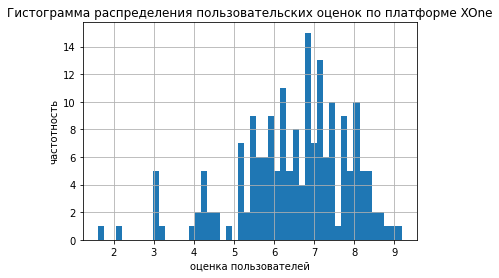

In [89]:
sample_1.hist(bins=50)
plt.title('Гистограмма распределения пользовательских оценок по платформе XOne')
plt.xlabel('оценка пользователей')
plt.ylabel('частотность')
plt.show()

In [90]:
sample_1.describe()

count    186.000000
mean       6.512903
std        1.374417
min        1.600000
25%        5.800000
50%        6.750000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

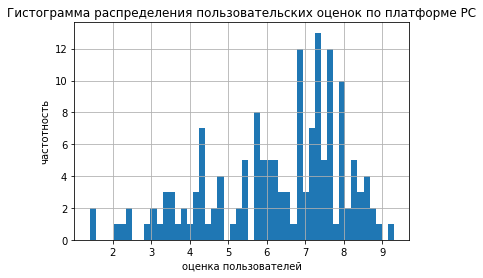

In [91]:
sample_2.hist(bins=50)
plt.title('Гистограмма распределения пользовательских оценок по платформе PC')
plt.xlabel('оценка пользователей')
plt.ylabel('частотность')
plt.show()

In [92]:
sample_2.describe()

count    156.000000
mean       6.273077
std        1.737271
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [93]:
# сравним размеры 2-х генеральных совокупностей 

display(sample_1.shape)
sample_2.shape

(186,)

(156,)

- Видно, что по обеим гистограммам распределение скошено влево, но это не мешает проверить гипотезы Т-тестом (генеральные совокупности не обязательно должны быть распределены нормально)
- Поскольку совокупности разного размера (хоть разница и не очень большая, порядка 15%), все же лучше включить условие equal_var = False в t-test

In [94]:
# создадим функцию stat для проверки нулевой гипотезы t-тестом 

def stat(sample_1, sample_2):
    alpha = .05 

    results = st.ttest_ind(
        sample_1, 
        sample_2,
        equal_var = False)

    print('p-значение: ', results.pvalue)

    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [95]:
# проверим нулевую гипотезу, применив функцию

stat(sample_1, sample_2)

p-значение:  0.16369538277760132
Не получилось отвергнуть нулевую гипотезу


***Предварительный вывод:***
- поскольку нулевая гипотеза подтвердилась, исходная гипотеза о том, что <span style="color:red">**cредние пользовательские рейтинги платформ Xbox One и PC одинаковые, подтвердилась.**</span>

### Вторая гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

1) Формулируем гипотезы:

- **Нулевая гипотеза (H0)**: средние пользовательские рейтинги жанров Action и Sports равны
- **Альтернативная гипотеза (H1)**: средние пользовательские рейтинги жанров Action и Sports не равны

2) Kритический уровень статистической значимости **alpha примем на уровне 0,05**

In [96]:
# создадим отдельные датасэты для каждой платформы
sample_3 = (
    df[(df['genre'] == 'Action') & (df['user_score'] > 0) & (df['year_of_release'] >= 2013)]
    ['user_score']
)

sample_4 = (
    df[(df['genre'] == 'Sports') & (df['user_score'] > 0) & (df['year_of_release'] >= 2013)]
    ['user_score']
)

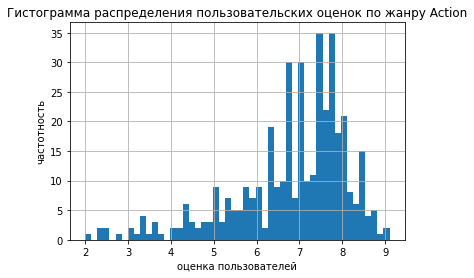

In [97]:
sample_3.hist(bins=50)
plt.title('Гистограмма распределения пользовательских оценок по жанру Action')
plt.xlabel('оценка пользователей')
plt.ylabel('частотность')
plt.show()

In [98]:
sample_3.describe()

count    393.000000
mean       6.826972
std        1.332439
min        2.000000
25%        6.300000
50%        7.100000
75%        7.700000
max        9.100000
Name: user_score, dtype: float64

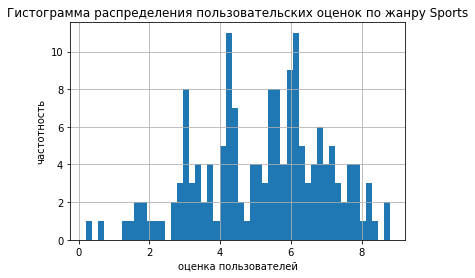

In [99]:
sample_4.hist(bins=50)
plt.title('Гистограмма распределения пользовательских оценок по жанру Sports')
plt.xlabel('оценка пользователей')
plt.ylabel('частотность')
plt.show()

In [100]:
sample_4.describe()

count    162.000000
mean       5.224691
std        1.776837
min        0.200000
25%        4.100000
50%        5.500000
75%        6.475000
max        8.800000
Name: user_score, dtype: float64

In [101]:
display(sample_3.shape)
sample_4.shape

(393,)

(162,)

Как и при проверке первой гипотезы:
- по первой гистограмме распределение скошено влево, а по второй больше напоминает по форме нормальное распределение
- совокупности разного размера, значит, здесь точно необходимо включить условие equal_var = False в t-test

In [102]:
stat(sample_3, sample_4)

p-значение:  5.894469247577666e-21
Отвергаем нулевую гипотезу


***Предварительный вывод:***
- поскольку нулевая гипотеза не подтвердилась, исходная гипотеза о том, что <span style="color:red">**средние пользовательские рейтинги жанров Action и Sports разные, подтвердилась.**</span>

### Вывод 5

**Обе рассматриваемые гипотезы не подтвердились:**
- cредние пользовательские рейтинги платформ Xbox One и PC не равны
- средние пользовательские рейтинги жанров Action и Sports равны

## Общий вывод

<span style="color:red">**1. Предобработка данных:**</span>
- названия всех столбцов были приведены к нижнему регистру
- были обработаны пропуски в столбцах user_score и critic_score (замена части пропусков на значение, рассчитанное через среднее соотношение этих столбцов, замена оставшихся пропуски на -1)
- в столбцах user_score, year_of_release типы данных были приведены к float и int соответственно
- в исходный df добавлен новый столбец  total_sales (суммарные продажи во всех регионах)


<span style="color:red">**2. Исследовательский нализ данных**:</span>


1) **Распределение количества выпущенных игр в 1980-2016 гг.** характеризовалось медленным подъемом до 1995 г. (данные до этого года исключены из анализа), резким ростом в период 1995-2009 гг. (до 1400 игр в год), затем снижением на фоне мирового экономического кризиса и оживлением в 2014-2015 гг. (до 600 игр в год)

2) **Распределение продаж игр в 1995-2016 гг. характеризуется следующим образом:**
 - данные по количеству проданных игр суммарно по всем платформам распределены нормально
 - **абсолютным лидером продаж по количеству игр являлась платформа PS2:**
  + суммарно за 12 лет на ней было продано более 1,2 млрд. копий, а за каждый год - в среднем более 100 млн. копий
  + по остальным лидерам индустрии суммарный объем продаж колебался в диапазоне от 800 млн. до порядка 1 млрд. копий (или 80-85 млн. копий в год)
 - средний срок жизни платформы составляет 8 лет, а **актуальный период**, на основе которого осуществляется поиск перспективных платформ, составляет 4 года
 - самый большой разброс продаж по играм за актуальный период у платформ-лидеров (по суммарной величине продаж и среднему числу продаж за год) производителя Sony: PS4 и PS3 - порядка 90-100 млн. копий (разница между максимальными и минимальными продажами)

 3) **Определение перспективных платформ:**
 - лидерами продаж за актуальный период являются 2 платформы компании Sony: PS4 и PS3
 - **найдены 2 перспективные платформы: PS4 и XOne**: можно предположить, что в дальнейшем по этим платформам может наблюдаться рост в течение еще какого-то времени, или как-минимум стабилизация продаж на уровне 2016 г., если платформы находятся уже вблизи пика развития
 - **PS4 все же перспективнее**, чем XOne: 
    + средние продажи PS4 находятся на уровне чуть ниже  80  млн. копий в год; по XOne средние продажи почти в 2 раза ниже - порядка 40 млн. копий в год
    + PS4 является преемницей предыдущих платформ линейки Playstation (продажи PS3 и PS2, продажи которых суммарно составляют 45% в топ-5 платформ на более длинном отрезке времени), и у нее есть потенциал для увеличения роста внутри холдинга путем занятия ниши еще присуствующей на рынке PS3
        
4) **Факторы, влияющие на продажи игр:**
 - отзывы критиков и пользователей оказывают слабое влияние на продажи (слабая корреляция подтверждается статистически и графически)
 - **игровой жанр существенно влияет на продажи:** по суммарным и среднегодовым продажам за расссматривамый период **лидируют Action и Shooter** (суммарно: порядка 320 и 230 млн. копий соответственнно), **аутсайдеры - puzzle и strategy** (суммарно: 10 и менее млн. копий)
 
<span style="color:red">**3. Составляение характерного портрета пользователя каждого региона**:</span>

1) **Лидеры продаж:**
 - **По принадлежности к платформам**:
  + лидеры продаж выделяются в зависимости от региона: **в Северной Америке и Европе лидер по продажам - компания Playstation** (PS3, PS4, PSV) - 45% и 63% соответственно, на втором месте Xbox (X360, XOne) - 45% и 28% соответственно, а Nintendo (3DS, WiiU) занимает лишь 3-е место - 10% и 9% соответственно, в то время как **в Японии Nintendo, наоборот, лидирует с результатом в 58%**
  + во всех регионах **лидируют японские производители** (Playstation и Nintendo), а в частности в Японии они вообще занимают весь рынок топ-5-платформ
 
 - **По жанровым предпочтениям:**
  + лидеры продаж **в Северной Америке и Европе: Action и Shooter** (от 27 до 36% в топ-5 жанров по продажам)
  + **в Японии большим отрывом лидирует жанр Role-Playing** (44% в топ-5 жанров по продажам), а затем уже идет лидер западных предпочтений - Action (35%)

 - **По рейтингу ESRB:**
  + самыми популярными играми в Северной Америке и Европе являются игры для взрослых (от 17 лет и старше, порядка 40%)
  + самыми продаваемыми в Японии являются игры без возрастного рейтинга (60%)

2) **Пользователи из Северной Америки и Европы очень похожи друг на друга**:
 - выбирают в первую очередь платформы Playstation и Xbox
 - по игровому жанру предпочитают Action и Shooter
 - по возрастному ограничению - это прежде всего взрослые от 17 лет
 
3) **Японские пользователи несколько отличаются от западных:**
 - выбирают в подавляющем большинстве практически только платформы отечественного производства (Playstation и Nintendo)
 - предпочитают играть прежде всего в Role-Playing, а уж потом в Action, популярные в Америке и Европе
 - про возрастные категории японских игроков нельзя сказать ничего определенного
 
 

<span style="color:red">**4. Проверка гипотез**:</span>

1) Гипотеза о том, что **cредние пользовательские рейтинги платформ Xbox One и PC одинаковые, подтвердилась**

2) Гипотеза о том, что **средние пользовательские рейтинги жанров Action и Sports разные, подтвердилась**

<span style="color:red">**5. Прогноз на 2017 г.**:</span>

1) Основные продажи, в Европе и Северной Америке лучше всего сосредоточить **на реализации игр Playstation, а именно игр на платформе PS4, для Японии лучший выбор - 3DS от Nintendo**

2) В западных странах до 80% продаж предпочтительнее реализовывать в жанрах: Action, Shooter и Sport, а в Японии порядка 40-45% в Role-Playing и 30-40% суммарно в Action

3) Пользователям **в Северной Америке и Европе лучше предлагать, прежде всего, игры для взрослых (от 17 лет), в Японии - игры без возрастного рейтинга**